In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns   
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('data/data_processed/client_data.csv')

In [5]:
df.head()

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,60,11,101,0.0,35,352.400000,10.571429,0.000000,0.000000
1,69,11,107,0.0,37,557.540541,0.000000,0.000000,0.000000
2,62,11,301,0.0,18,798.611111,37.888889,0.000000,0.000000
3,69,11,105,0.0,20,1.200000,0.000000,0.000000,0.000000
4,62,11,303,0.0,14,663.714286,104.857143,117.357143,36.714286


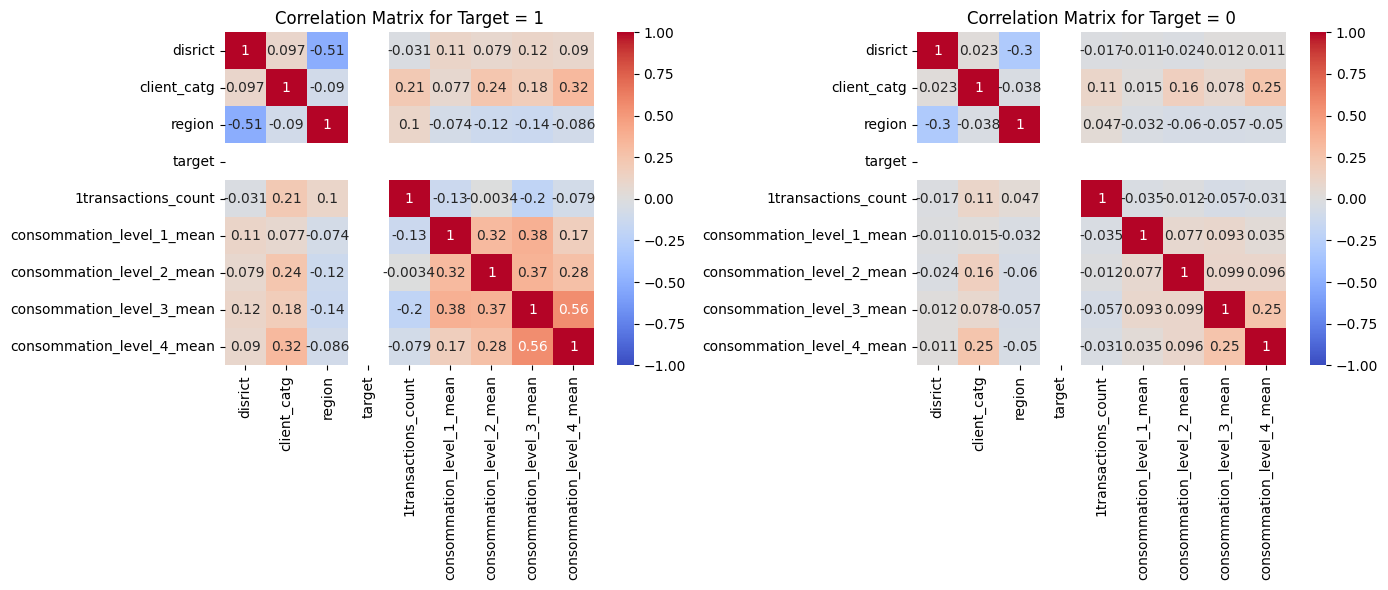

In [7]:
# Filter the dataframe for target = 1 and target = 0
df_target_1 = df[df['target'] == 1]
df_target_0 = df[df['target'] == 0]

# Compute the correlation matrices
correlation_matrix_target_1 = df_target_1.corr()
correlation_matrix_target_0 = df_target_0.corr()

# Plot the heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_target_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Target = 1')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_target_0, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Target = 0')

plt.tight_layout()
plt.show()

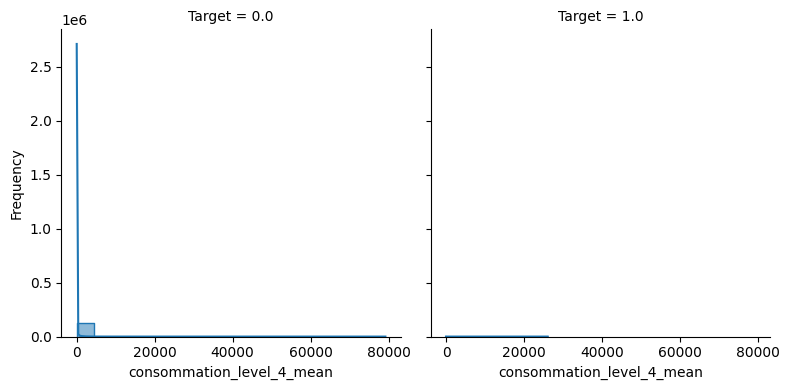

In [13]:
# Create a FacetGrid for the target variable
g = sns.FacetGrid(df, col='target', col_wrap=2, height=4)

# Map a histogram plot to the grid
g.map(sns.histplot, 'consommation_level_4_mean', kde=True, element='step')

# Add titles and labels
g.set_titles(col_template='Target = {col_name}')
g.set_axis_labels('consommation_level_4_mean', 'Frequency')

plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42, stratify=df['target'], shuffle=True)

basemodel = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)
basemodel.fit(X_train, y_train)
y_pred = basemodel.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25381 12997]
 [  914  1356]]
              precision    recall  f1-score   support

         0.0       0.97      0.66      0.78     38378
         1.0       0.09      0.60      0.16      2270

    accuracy                           0.66     40648
   macro avg       0.53      0.63      0.47     40648
weighted avg       0.92      0.66      0.75     40648

